# Project CNN ANN

A "convolutional neural network" (CNN) is an artificial neural network model that finds good application in visual image analysis, which uses techniques such as convolution or filters.

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
import numpy as np
from numpy import asarray
from numpy import unique
from numpy import argmax
import os
import random as python_random
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [3]:
def rseed():
    random_seed = 123
    python_random.seed(random_seed)
    np.random.seed(random_seed)
    tf.random.set_seed(random_seed)
    os.environ['PYTHONHASHSEED'] = str(random_seed)
rseed()

In [4]:
def curva():
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.ylabel('Perda')
    plt.xlabel('Épocas')
    plt.plot(history.history['loss'], label="Treino")
    plt.plot(history.history['val_loss'], label="Validação")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.ylabel("Acurácia")
    plt.xlabel("Épocas")
    plt.plot(history.history["accuracy"], label="Treino")
    plt.plot(history.history["val_accuracy"], label="Validação")
    plt.legend()
    plt.show()

This project uses only two datasets, one for training and one for validation. Validation data is also used for prediction.

In [5]:
(x_train, y_train), (x_test, y_test) = load_data()

In [6]:
x_train = x_train.reshape(
    (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape(
    (x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [7]:
in_shape = x_train.shape[1:]

In [8]:
in_shape

(28, 28, 1)

In [9]:
n_classes = len(unique(y_train))
n_classes

10

In [10]:
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

In [11]:
x_train_norm.shape

(60000, 28, 28, 1)

In [12]:
x_test_norm.shape

(10000, 28, 28, 1)

In [13]:
y_test.shape

(10000,)

In [14]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# CNN

**Conv2D**: The 2D convolution layer creates a convolution kernel that is convoluted with the layer's input to produce an outputs tensor :

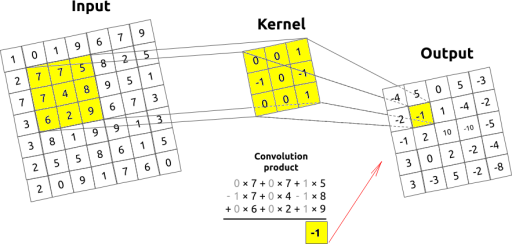

**MaxPool2D**: Max pool operation for 2D spatial data. Downsamples the input along its spatial dimensions (height and width) by taking the maximum value in an input window (of size defined by pool_size) for each channel of the input. The window is moved in large steps along each dimension :

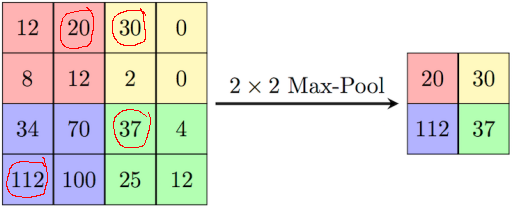

**Flatten**: Flattens the input. Does not affect batch size :

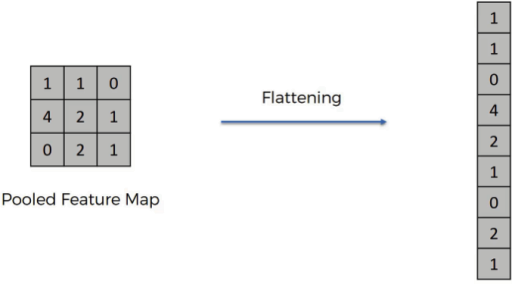

**Dense**: implements the *output = activation(dot(input, kernel) + bias)* operation :

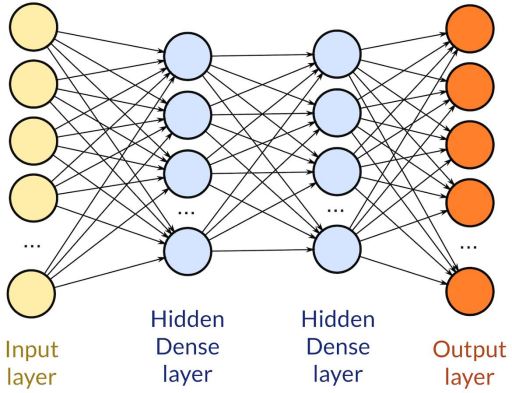

**Dropout** - The Dropout layer randomly sets the input units to 0 with a rate frequency at each step during the training time, which helps to avoid overfitting. Entries not set to 0 are incremented by 1/(1 - rate) so that the sum of all entries is unchanged :

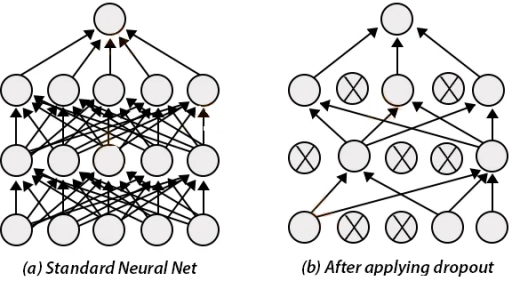

rseed() tries to make the results reproducible :

## Topology 1

In [15]:
rseed()

model = Sequential()
model.add(
    Conv2D(
        32,      # number or filters (output)
        (3, 3),  # kernel size
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=in_shape))  # (28, 28, 1)
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation="relu", kernel_initializer="he_uniform"))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation="softmax"))

2022-08-25 09:14:01.267004: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-25 09:14:08.182922: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2319 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

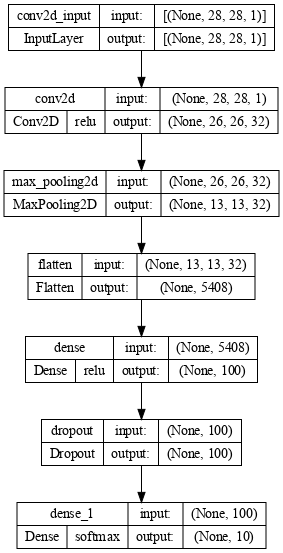

In [17]:
plot_model(model, show_shapes=True, show_layer_activations=True, dpi=72)

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train_norm,
                    y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_test_norm, y_test),
                    verbose=0)

2022-08-25 09:14:12.855131: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-08-25 09:14:13.904301: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-08-25 09:14:21.079932: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-08-25 09:14:41.470187: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.
2022-08-25 09:14:41.777090: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


In [20]:
loss, acc = model.evaluate(x_test_norm, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

2022-08-25 09:19:05.824410: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


Accuracy: 0.988


In [21]:
image = x_train_norm[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

1/1 [==============================] - 1s 575ms/step
Predicted: class=5


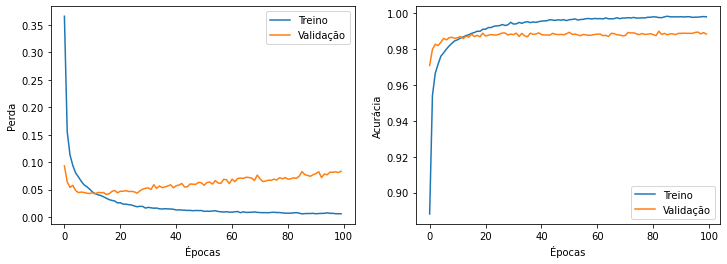

In [22]:
curva()

This topology ranked second in accuracy, along with Topologies 3 and 6.

Prediction:

In [23]:
codings = model.predict(x_test_norm)

313/313 [==============================] - 0s 1ms/step


In [24]:
lb1 = np.argmax(codings, axis=-1)

## Topology 2

With 30 neurons in the hidden layer :

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 50)                270450    
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                      

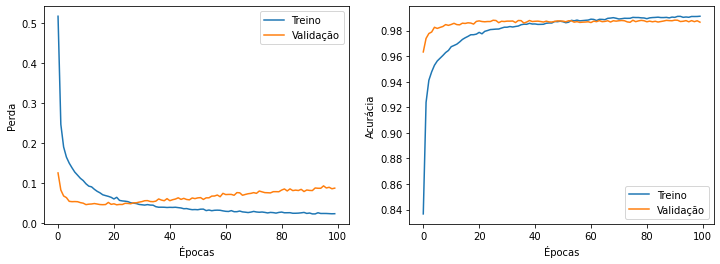

In [25]:
rseed()
model = Sequential()
model.add(
    Conv2D(
        32,      # number or filters (output)
        (3, 3),  # kernel size
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=in_shape))  # (28, 28, 1)
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation="relu", kernel_initializer="he_uniform"))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation="softmax"))

model.summary()
plot_model(model, show_shapes=True, show_layer_activations=True, dpi=72)
plt.show()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_norm,
                    y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_test_norm, y_test),
                    verbose=0)

loss, acc = model.evaluate(x_test_norm, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

image = x_train_norm[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

curva()

Compared to topology 1, the reduction from 100 to 30 neurons in the hidden layer reduced the accuracy during training and validation. However, as the reduction in accuracy during validation was not very large, this could justify the use of topology 2.

Prediction:

In [26]:
codings = model.predict(x_test_norm)

313/313 [==============================] - 0s 2ms/step


In [27]:
lb2 = np.argmax(codings, axis=-1)

## Topology 3

Sem a camada Dropout:

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               540900    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

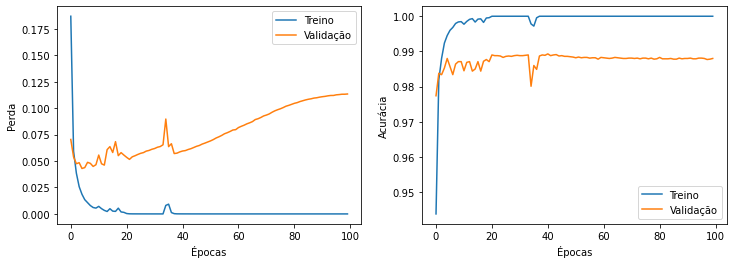

In [28]:
rseed()
model = Sequential()
model.add(
    Conv2D(
        32,      # number or filters (output)
        (3, 3),  # kernel size
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=in_shape))  # (28, 28, 1)
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation="relu", kernel_initializer="he_uniform"))
model.add(Dense(n_classes, activation="softmax"))

model.summary()
plot_model(model, show_shapes=True, show_layer_activations=True, dpi=72)
plt.show()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_norm,
                    y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_test_norm, y_test),
                    verbose=0)

loss, acc = model.evaluate(x_test_norm, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

image = x_train_norm[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

curva()

Without the dropout layer the validation accuracy remained the same as topology 1, and the accuracy during training increased.

Prediction:

In [29]:
codings = model.predict(x_test_norm)

313/313 [==============================] - 0s 1ms/step


In [30]:
lb3 = np.argmax(codings, axis=-1)

## Topology 4

Kernel size 5x5

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               460900    
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                      

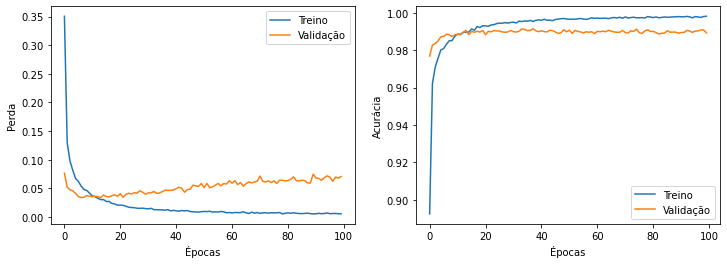

In [31]:
rseed()
model = Sequential()
model.add(
    Conv2D(
        32,      # number or filters (output)
        (5, 5),  # kernel size
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=in_shape))  # (28, 28, 1)
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation="relu", kernel_initializer="he_uniform"))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation="softmax"))

model.summary()
plot_model(model, show_shapes=True, show_layer_activations=True, dpi=72)
plt.show()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_norm,
                    y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_test_norm, y_test),
                    verbose=0)

loss, acc = model.evaluate(x_test_norm, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

image = x_train_norm[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

curva()

Topology 4 (kernel size 5x5) turned out to be a little better than the previous ones.

Prediction:

In [32]:
codings = model.predict(x_test_norm)

313/313 [==============================] - 0s 1ms/step


In [33]:
lb4 = np.argmax(codings, axis=-1)

## Topology 5

Maxpool 5x5

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               80100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                      

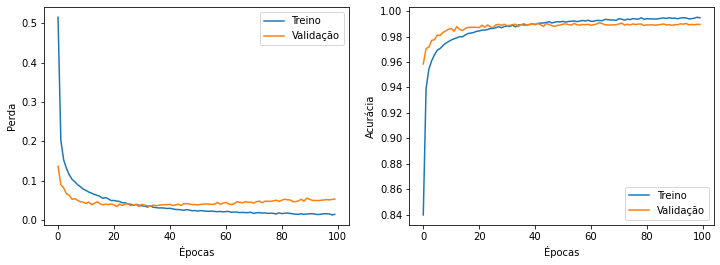

In [34]:
rseed()
model = Sequential()
model.add(
    Conv2D(
        32,      # number or filters (output)
        (3, 3),  # kernel size
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=in_shape))  # (28, 28, 1)
model.add(MaxPool2D((5, 5)))
model.add(Flatten())
model.add(Dense(100, activation="relu", kernel_initializer="he_uniform"))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation="softmax"))

model.summary()
plot_model(model, show_shapes=True, show_layer_activations=True, dpi=72)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_norm,
                    y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_test_norm, y_test),
                    verbose=0)

loss, acc = model.evaluate(x_test_norm, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

image = x_train_norm[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

curva()

With Maxpool 5x5 the accuracy was similar to the previous one.

Prediction:

In [35]:
codings = model.predict(x_test_norm)

313/313 [==============================] - 0s 1ms/step


In [36]:
lb5 = np.argmax(codings, axis=-1)

## Topology 6

Number of filters = 16

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 2704)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               270500    
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                      

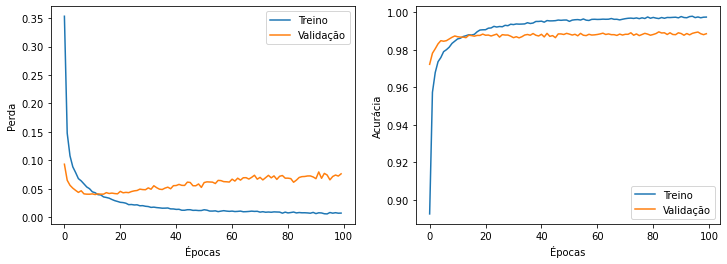

In [37]:
rseed()
model = Sequential()
model.add(
    Conv2D(
        16,      # number or filters (output)
        (3, 3),  # kernel size
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=in_shape))  # (28, 28, 1)
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation="relu", kernel_initializer="he_uniform"))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation="softmax"))

model.summary()
plot_model(model, show_shapes=True, show_layer_activations=True, dpi=72)
plt.show()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_norm,
                    y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_test_norm, y_test),
                    verbose=0)

loss, acc = model.evaluate(x_test_norm, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

image = x_train_norm[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

curva()

With 16 filters instead of 32, the validation accuracy reduced.

Prediction :

In [38]:
codings = model.predict(x_test_norm)

313/313 [==============================] - 0s 1ms/step


In [39]:
lb6 = np.argmax(codings, axis=-1)

## Topology 7

Combining topologies 2 and 6:
- Number of filters = 16
- 30 neurons in the hidden layer

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 2704)              0         
                                                                 
 dense_12 (Dense)            (None, 30)                81150     
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                310       
                                                      

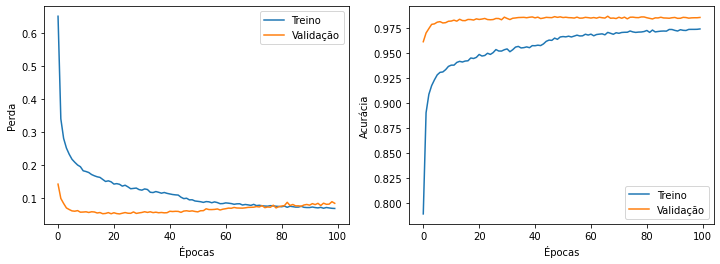

In [40]:
rseed()
model = Sequential()
model.add(
    Conv2D(
        16,      # number or filters (output)
        (3, 3),  # kernel size
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=in_shape))  # (28, 28, 1)
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(30, activation="relu", kernel_initializer="he_uniform"))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation="softmax"))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_norm,
                    y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_test_norm, y_test),
                    verbose=0)

loss, acc = model.evaluate(x_test_norm, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

image = x_train_norm[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

curva()

This topology did not improve with respect to previous topologies.

Prediction:

In [43]:
codings = model.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step


In [44]:
lb7 = np.argmax(codings, axis=-1)

## Accuracies obtained

    Topology 1: 0.988
    Topology 2: 0.987
    Topology 3: 0.988
    Topology 4: 0.989  (*)
    Topology 5: 0.989  (*)
    Topology 6: 0.988
    Topology 7: 0.985

The two Topologies with the best accuracy are 4 and 5

In general, the accuracies were similar.

## Confusion matrix

Topology 4:

In [74]:
cm4 = metrics.confusion_matrix(y_test, lb4)

In [75]:
cm4

array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1130,    1,    1,    1,    0,    1,    1,    0,    0],
       [   1,    0, 1022,    0,    2,    0,    0,    7,    0,    0],
       [   0,    0,    2,  997,    0,    6,    0,    2,    2,    1],
       [   0,    0,    0,    0,  974,    0,    3,    1,    0,    4],
       [   0,    0,    0,    7,    0,  881,    1,    0,    2,    1],
       [   3,    2,    0,    0,    4,    1,  947,    0,    1,    0],
       [   0,    2,    6,    0,    1,    0,    0, 1016,    1,    2],
       [   3,    0,    2,    0,    2,    0,    0,    0,  965,    2],
       [   0,    2,    1,    1,    7,    7,    0,    3,    4,  984]])

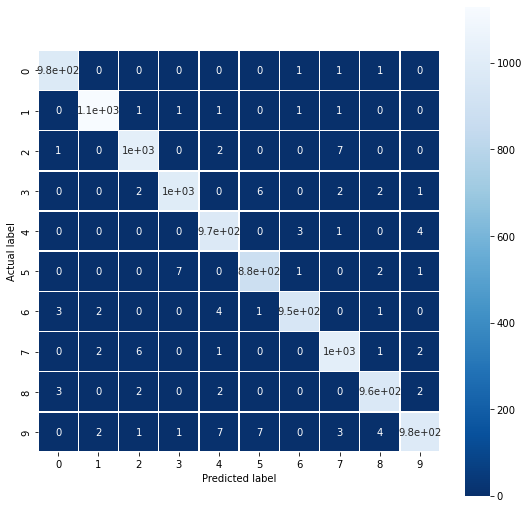

In [76]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm4,
            annot=True,
            #fmt=".3f",
            linewidths=.5,
            square=True,
            cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

This test compares the prediction with the actual value.

##### Topology 5:

In [77]:
cm5 = metrics.confusion_matrix(y_test, lb5)

In [78]:
cm5

array([[ 975,    0,    0,    1,    0,    0,    2,    1,    1,    0],
       [   0, 1129,    1,    2,    0,    2,    1,    0,    0,    0],
       [   2,    0, 1026,    1,    0,    0,    0,    3,    0,    0],
       [   0,    0,    0, 1004,    0,    3,    0,    2,    1,    0],
       [   0,    0,    1,    0,  975,    0,    2,    0,    2,    2],
       [   2,    0,    0,    5,    0,  883,    2,    0,    0,    0],
       [   6,    2,    0,    0,    2,    3,  943,    0,    2,    0],
       [   0,    4,    6,    1,    0,    0,    0, 1014,    1,    2],
       [   1,    0,    2,    1,    1,    1,    1,    0,  966,    1],
       [   0,    1,    2,    3,    9,    2,    0,    6,    6,  980]])

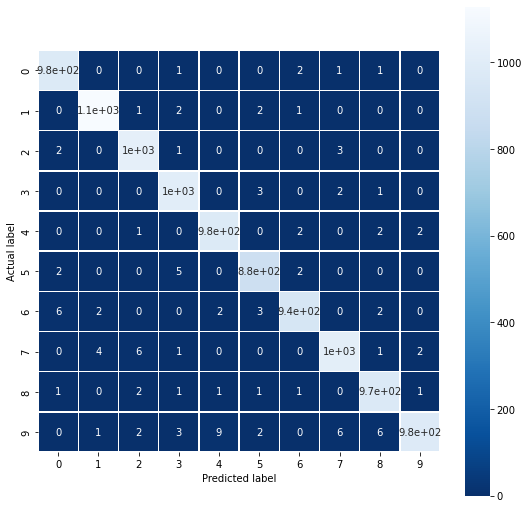

In [79]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm5,
            annot=True,
            #fmt=".3f",
            linewidths=.5,
            square=True,
            cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

## Contingency table

McNemar test for the two best models:

In [80]:
df4 =  pd.DataFrame(lb4, columns=['Topo4'])

In [81]:
df5 =  pd.DataFrame(lb5, columns=['Topo5'])

In [82]:
ct = pd.crosstab(df4['Topo4'], df5['Topo5'])
ct

Topo5,0,1,2,3,4,5,6,7,8,9
Topo4,,,,,,,,,,
0,978,0,0,1,0,0,3,0,2,0
1,0,1130,0,1,0,2,1,0,1,1
2,1,0,1026,3,0,0,0,4,0,0
3,0,0,0,1001,0,4,0,1,0,0
4,1,1,3,0,976,0,3,1,3,3
5,2,0,0,6,0,881,1,0,0,5
6,3,2,0,0,3,2,942,0,1,0
7,0,3,8,2,1,0,0,1015,0,2
8,1,0,0,2,1,3,1,0,967,1


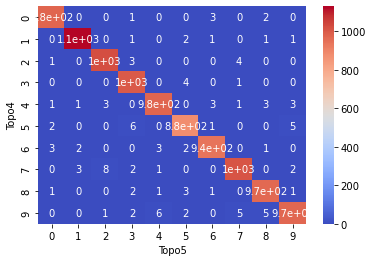

In [83]:
sns.heatmap(ct, cmap='coolwarm', annot=True);

This test compares the prediction accuracy of the two models.

<hr style="height:10px;border-width:0;background-color:blue">

# MLP

In [57]:
(ds_train, ds_test), ds_info = tfds.load('mnist',
                                         split=['train', 'test'],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

In [58]:
ds_train

<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [59]:
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [60]:
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

In [61]:
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

In [62]:
ds_train = ds_train.cache()

In [63]:
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)

In [64]:
ds_train = ds_train.batch(128)

In [65]:
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [66]:
ds_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [67]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [68]:
ds_test

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [69]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [70]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


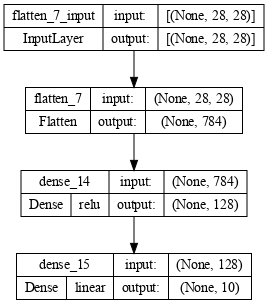

In [71]:
plot_model(model2, show_shapes=True, show_layer_activations=True, dpi=72)

In [72]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

history = model2.fit(ds_train, epochs=100, validation_data=ds_test, verbose=0)

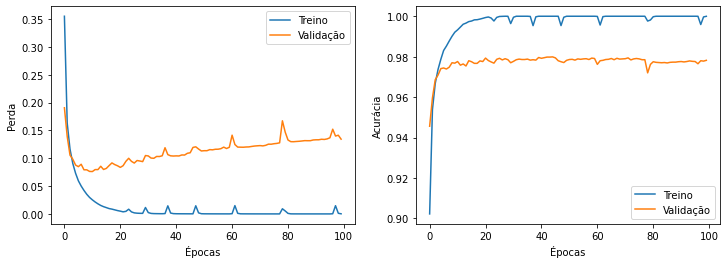

In [73]:
curva()

Comparing the above curves (MLP) with the previous curves (CNN), the training losses were similar, however there was a difference in relation to the validation where the accuracy was lower.

# References

- https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
- https://www.tensorflow.org/datasets/keras_example